## 1. 스킬트리
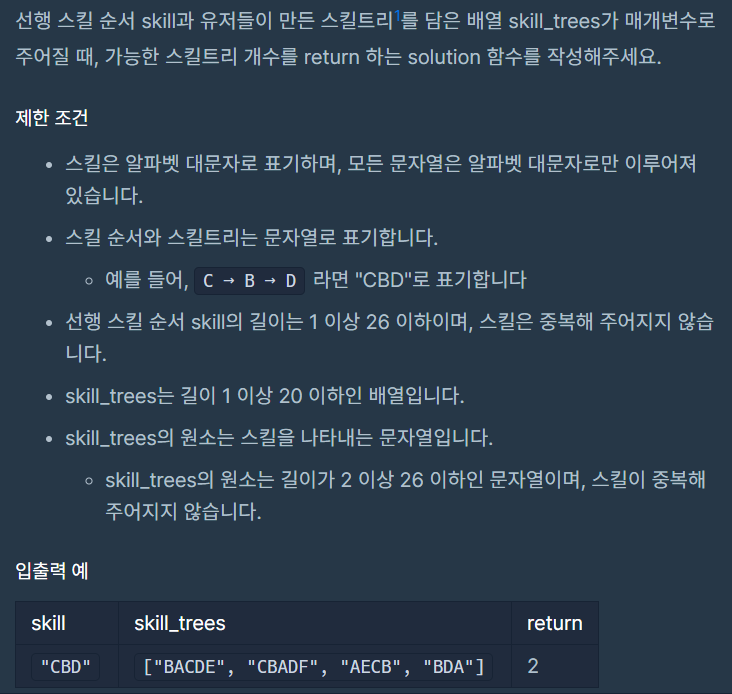

### 내 풀이
- 정규표현식으로 상관없는 스킬 제거
- 인덱스 값 검사

In [ ]:
import re

def solution(skill, skill_trees):
    result = 0
    for x in skill_trees:
        # 의미없는 스킬 제거
        x = re.sub('[^' + skill + ']', '', x)
        flag = True
        for i in range(len(x)):
            if i == skill.index(x[i]):
                continue
            else:
                flag = False
                break
        if flag:
            result += 1
    return result

### 상위 코드
- list에서 앞의 원소를 pop()하면서 검사

In [ ]:
def solution(skill, skill_trees):
    answer = 0

    for skills in skill_trees:
        skill_list = list(skill)

        for s in skills:
            if s in skill:
                if s != skill_list.pop(0):
                    break
        else:
            answer += 1

    return answer


## 2. 프린터
1. 인쇄 대기목록의 가장 앞에 있는 문서(J)를 대기목록에서 꺼냅니다.
2. 나머지 인쇄 대기목록에서 J보다 중요도가 높은 문서가 한 개라도 존재하면 J를 대기목록의 가장 마지막에 넣습니다.
3. 그렇지 않으면 J를 인쇄합니다.
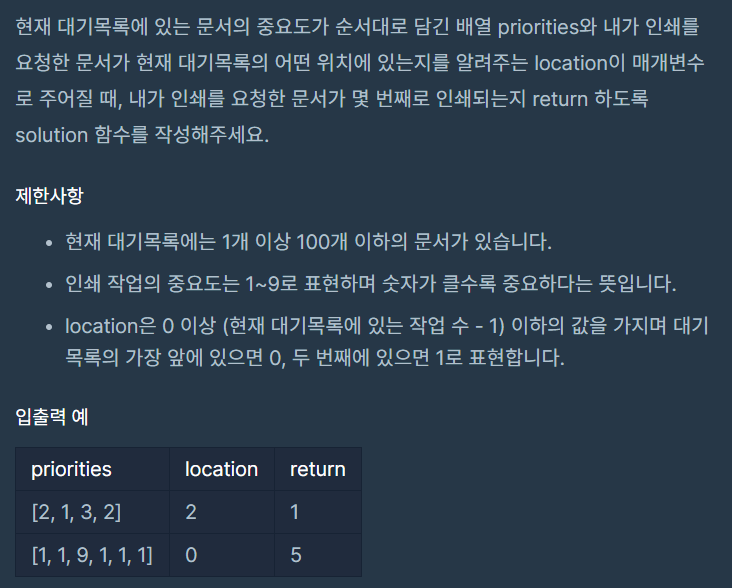

### 내 풀이
- deque 사용

In [17]:
from collections import deque

def solution(priorities, location):
    # (문서 번호, 중요도)로 큐에 삽입
    priorities = deque([(i, j) for i, j in enumerate(priorities)])
    result = []

    while True:
        num, importance = priorities.popleft()
        if len(priorities) == 0:
            result.append(num)
            break
        # 중요도가 더 큰 문서가 있는 경우
        if importance < max([j for i, j in priorities]):
            priorities.append((num, importance))
        # 해당 문서를 인쇄할 순서인 경우
        else:
            result.append(num)
            
    return result.index(location) + 1

### 상위 코드
- any()
- 답을 찾았을 경우 바로 리턴

In [ ]:
def solution(priorities, location):
    queue =  [(i,p) for i,p in enumerate(priorities)]
    answer = 0
    while True:
        cur = queue.pop(0)
        if any(cur[1] < q[1] for q in queue):
            queue.append(cur)
        else:
            answer += 1
            if cur[0] == location:
                return answer

## 3. 숫자의 표현
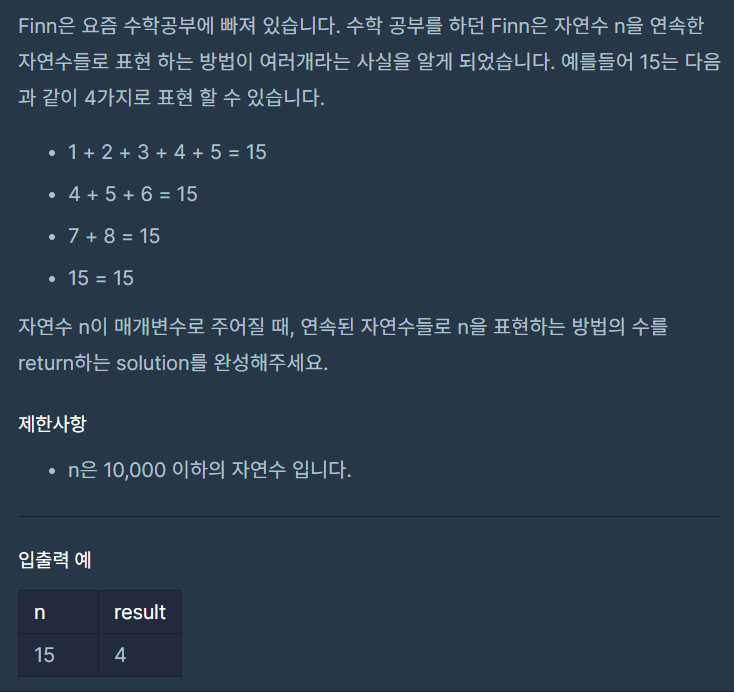

### 내 풀이
- n이 짝수이건 홀수이건 홀수를 약수로 가지는 경우의 수 + 1씩 해주면 된다

In [19]:
def solution(n):        
    # 1과 자기 자신을 제외한 약수 구하기
    arr = [i for i in range(2, n // 2 + 1) if n % i == 0]
    
    answer = 0
    # n이 짝수
    if n % 2 == 0:
        # 자기 자신
        answer = 1
        for x in arr:
            if x % 2 != 0:
                answer += 1
            
    # n이 홀수
    else:
        answer = 2 
        answer += len(arr)
        
    return answer 

### 상위 코드

In [21]:
def expressions(num):
    return len([i for i in range(1, num + 1, 2) if num % i == 0])

## 4. 오픈채팅방

In [24]:
def solution(record):
    answer = []
    # 유저 아이디 : 닉네임
    id_dict = {}
    result = []
    for s in record:
        message = s.split(' ')
        answer.append(message)
        if message[0] == 'Enter' or message[0] == 'Change':
            id_dict[message[1]] = message[2]
    
    for a in answer:
        if len(a) == 3:
            if a[0] == 'Enter':
                result.append(id_dict[a[1]]+'님이 들어왔습니다.')
        else:
            result.append(id_dict[a[1]]+'님이 나갔습니다.')
            
    return result

In [25]:
solution(["Enter uid1234 Muzi", "Enter uid4567 Prodo","Leave uid1234","Enter uid1234 Prodo","Change uid4567 Ryan"])

[['Enter', 'uid1234', 'Muzi'], ['Enter', 'uid4567', 'Prodo'], ['Leave', 'uid1234'], ['Enter', 'uid1234', 'Prodo'], ['Change', 'uid4567', 'Ryan']]


['Prodo님이 들어왔습니다.', 'Ryan님이 들어왔습니다.', 'Prodo님이 나갔습니다.', 'Prodo님이 들어왔습니다.']

## 5. 메뉴 리뉴얼
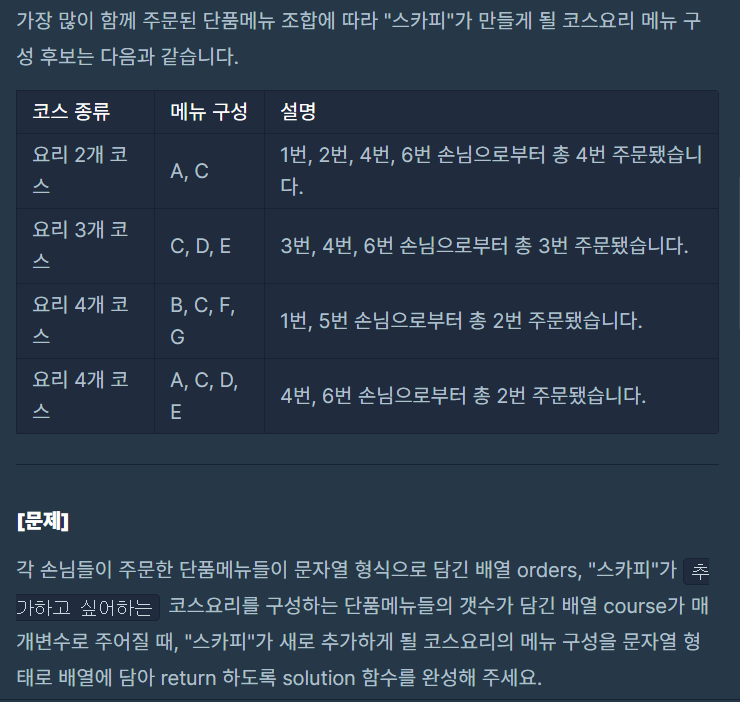

### 내 풀이
- 조합, counter 사용
- 딕셔너리에서 값만 보고 싶을 때는 value!!

In [ ]:
import itertools
import collections

def solution(orders, course):
    answer = []
    for num in course:
        temp = []
        for o in orders:
            o = sorted(list(o))
            temp += [''.join(i) for i in list(itertools.combinations(o, num))]
        temp = dict(collections.Counter(temp))
        answer += [i for i in temp.keys() if temp[i] >= max(max(temp.values()), 2)]
            
    return sorted(answer)

### 상위 코드
- 로직은 같음
- Counter에서 most_common() 함수 알아두자

In [ ]:
import collections
import itertools

def solution(orders, course):
    result = []

    for course_size in course:
        order_combinations = []
        for order in orders:
            order_combinations += itertools.combinations(sorted(order), course_size)

        most_ordered = collections.Counter(order_combinations).most_common()
        result += [ k for k, v in most_ordered if v > 1 and v == most_ordered[0][1] ]

    return [ ''.join(v) for v in sorted(result) ]

## 6. 방문 길이
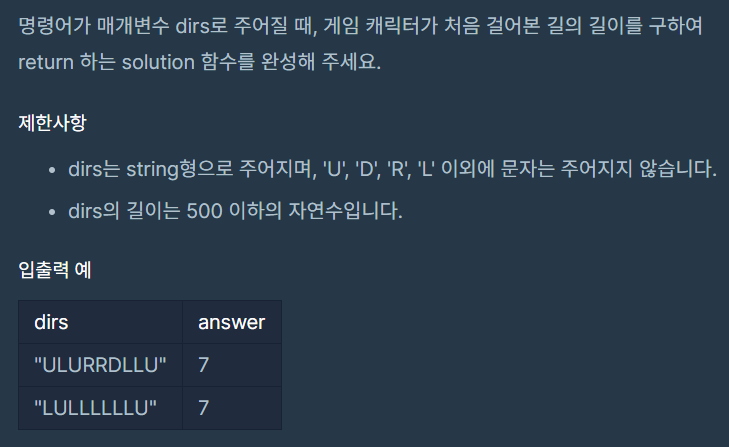

### 내 코드
- 지나온 길을 (시작점, 끝점)으로 저장해둠
- 반대의 경우도 겹치는 길임을 체크할 것 

In [6]:
def solution(dirs):
    direction = {'U':(-1, 0), 'D':(1, 0), 'R':(0, 1), 'L':(0, -1)}
    x, y = 5, 5
    # 지나온 경로 저장
    # ((x, y), (nx, ny))
    road = []
    answer = 0
    for d in dirs:
        nx = x + direction[d][0]
        ny = y + direction[d][1]
        if nx < 0 or nx > 10 or ny < 0 or ny > 10:
            continue
        # 지나온 경로가 아니라면 길의 길이 업데이트
        if [(x, y), (nx, ny)] not in road and [(nx, ny), (x, y)] not in road:
            answer += 1
            road.append([(x, y), (nx, ny)])
        x, y = nx, ny
        
    return answer

### 상위 코드
- 길 저장을 set()으로 해버림

In [ ]:
def solution(dirs):
    s = set()
    d = {'U': (0,1), 'D': (0, -1), 'R': (1, 0), 'L': (-1, 0)}
    x, y = 0, 0
    for i in dirs:
        nx, ny = x + d[i][0], y + d[i][1]
        
        if -5 <= nx <= 5 and -5 <= ny <= 5:
            s.add((x,y,nx,ny))
            s.add((nx,ny,x,y))
            x, y = nx, ny
            
    return len(s) // 2

## 7. 땅따먹기
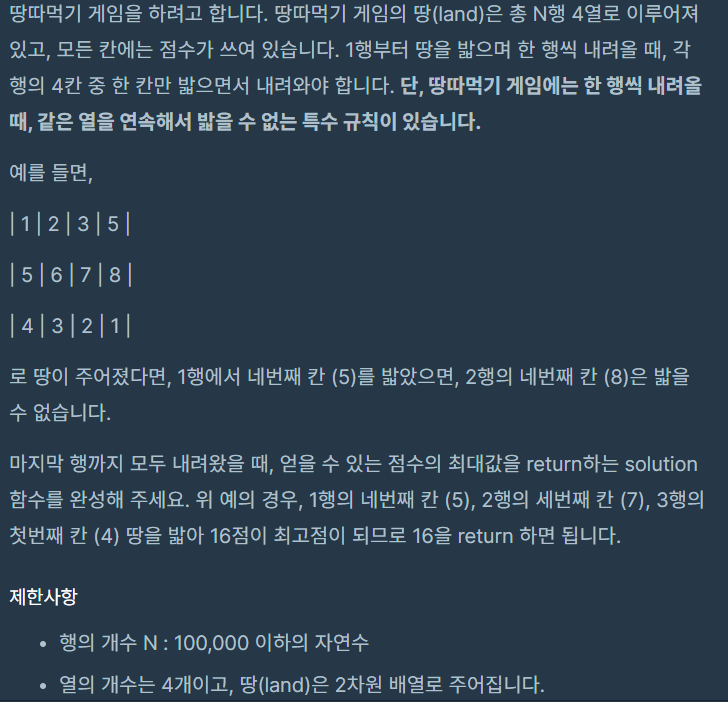

### 내 풀이

In [ ]:
# 다이나믹 프로그래밍 문제

def solution(land):
    for i in range(1, len(land)):
        for j in range(4):
            if j == 0:
                land[i][j] += max(land[i - 1][j + 1], land[i - 1][j + 2], land[i - 1][j + 3])
            elif j == 1:
                land[i][j] += max(land[i - 1][j - 1], land[i - 1][j + 1], land[i - 1][j + 2])
            elif j == 2:
                land[i][j] += max(land[i - 1][j - 2], land[i - 1][j - 1], land[i - 1][j + 1])
            else:
                land[i][j] += max(land[i - 1][j - 3], land[i - 1][j - 2], land[i - 1][j - 1])
                
    return max(land[len(land) - 1])

### 상위 코드
- 로직은 같으나 if문 분기 필요 없다

In [ ]:
def solution(land):

    for i in range(1, len(land)):
        for j in range(len(land[0])):
            land[i][j] = max(land[i -1][: j] + land[i - 1][j + 1:]) + land[i][j]

    return max(land[-1])

## 8. 최솟값 만들기
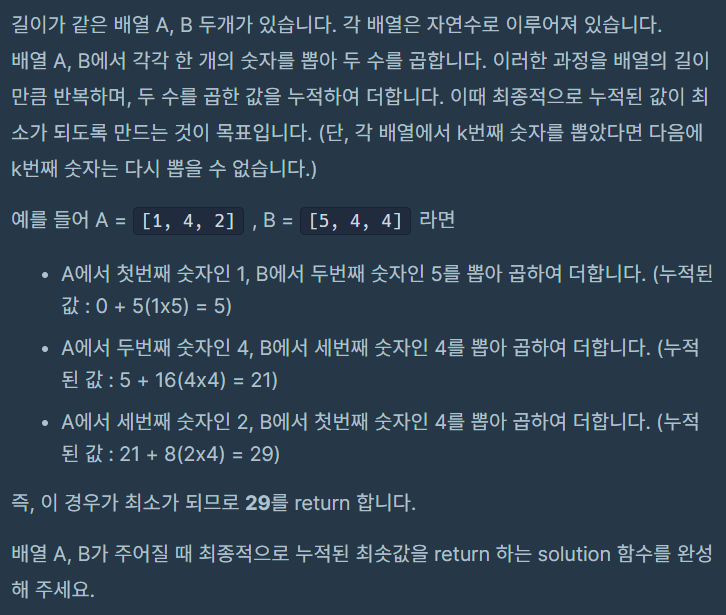

In [ ]:
def solution(A,B):
    A = sorted(A)
    B = sorted(B, reverse=True)
    return sum([i * j for i, j in zip(A, B)])

## 9. JadenCase 문자열 만들기

### 내 풀이
- 너무너무 쉽다고 생각했지만 테케 잡는게 어려웠음
- 앞 또는 뒤에 공백이 오는 경우도 처리해야

In [ ]:
def solution(s):
    answer = []
    for x in s.split(' '):
        if len(x) == 0:
            answer.append(x)
            continue
            
        if len(x) == 1:
            answer.append(x.upper())
            continue
            
        if x[0].isdigit():
            answer.append(x.lower())
        else:
            answer.append(x[0].upper() + x[1:].lower())
            
    return ' '.join(answer)

## 10. 영어 끝말잇기
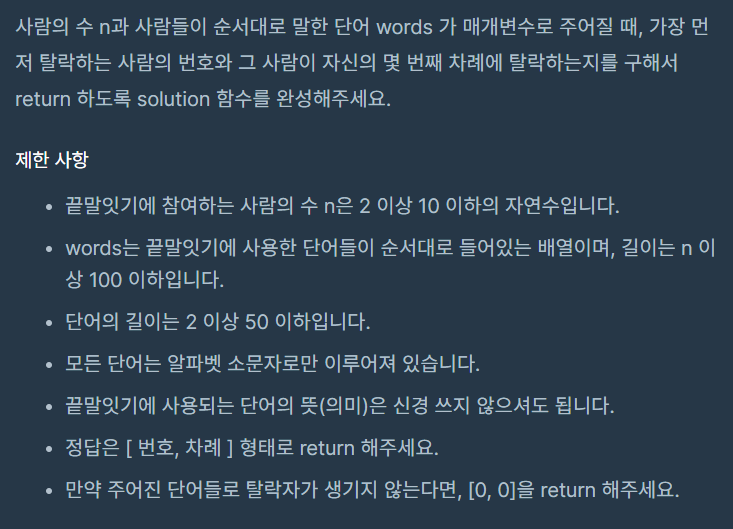

### 내 풀이

In [ ]:
def solution(n, words):
    num, turn = 2, 1
    answer = [words[0]]
    for j in range(1, len(words)):
        if words[j] in answer:
            return [num, turn]
        
        if words[j][0] == words[j - 1][-1]:
            answer.append(words[j])
        else:
            return [num, turn]
    
        if num == n:
            turn += 1 
            num = 1
        else:
            num += 1
            
    return [0, 0]

### 상위 코드
- 몫과 나머지로 몇번째 사람, 몇번째 차례인지 알 수 있음
- 앞에 나왔던 단어인지 확인하는 부분 words[p] in words[:p] 체크

In [ ]:
def solution(n, words):
    for p in range(1, len(words)):
        if words[p][0] != words[p - 1][-1] or words[p] in words[:p]: return [(p % n) + 1, (p // n) + 1]
    else:
        return [0,0]

## 11. 삼각 달팽이
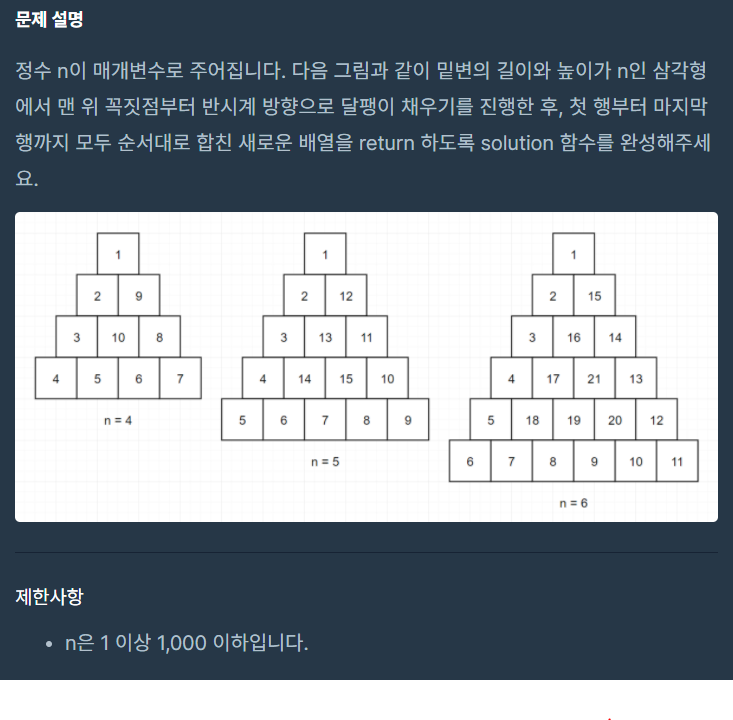

In [42]:
def solution(n):
    answer = [[] * n for _ in range(n)]
    num = 1
    start_num = n * 3 - 3
    start_index = 0
    for h in range(n, 0, -2):
        for i in range(start_index, start_index + h):
            answer[i].append(num)
            if i == start_index + h - 1:
                answer[i] += [x for x in range(num + 1, num + h - 1)]
                num = start_num
            else:
                num += 1
        start_index += 1
        start_num -= 1
    
    print(answer)
    if n % 2 != 0: i += 1
    for j in range(i, n):
        answer[j].append(start_num + 1)
        start_num -= 1
        
    print(answer)
    return answer

In [44]:
solution(6)

[[1], [2, 15], [3, 16, 14], [4, 17, 15], [5, 18, 19, 20], [6, 7, 8, 9, 10]]
[[1], [2, 15], [3, 16, 14], [4, 17, 15, 13], [5, 18, 19, 20, 12], [6, 7, 8, 9, 10, 11]]


[[1],
 [2, 15],
 [3, 16, 14],
 [4, 17, 15, 13],
 [5, 18, 19, 20, 12],
 [6, 7, 8, 9, 10, 11]]

## 12. 이진 변환 반복하기
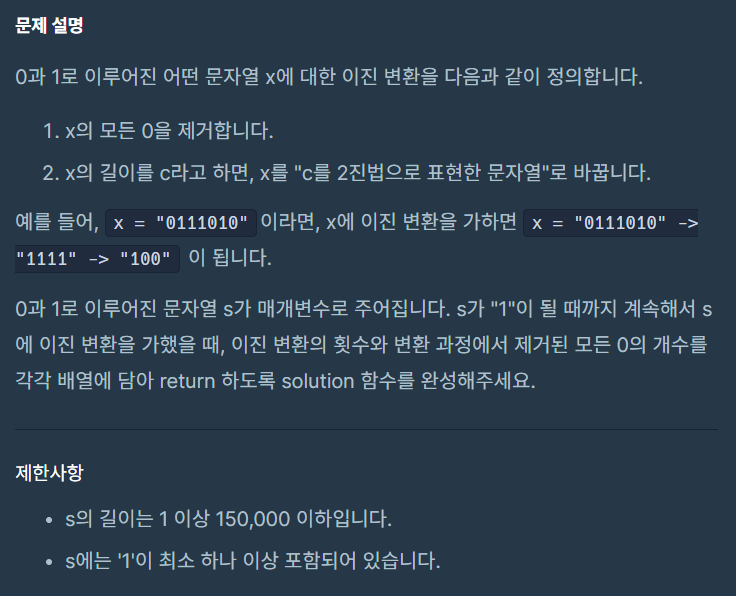

### 내 풀이

In [52]:
def solution(s):
    count_zero = 0
    count_change = 0
    while True:
        if s == '1':
            return [count_change, count_zero]
        count_zero += s.count('0')
        s = s.replace('0', '')
        s = bin(len(s))[2:]
        count_change += 1

### 상위 코드

In [72]:
def solution(s):
    while s != '':
        print(s)
        for i in range(0, len(s) - 1):
            if s[i] == s[i + 1]:
                s = s[:i] + s[i + 2:]
                break

In [73]:
solution('baabaa')

baabaa
bbaa
aa


## 13. 파일명 정렬
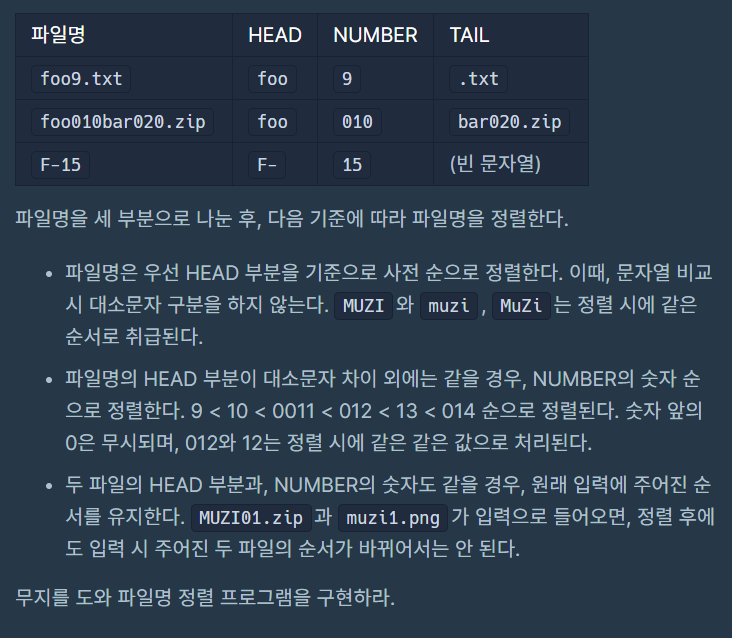

### 내 풀이

In [ ]:
import re
p = re.compile('[0-9]+')

def solution(files):
    answer = []
    for i, f in enumerate(files):
        m = p.search(f)
        head = f[:m.start()]
        number = f[m.start():m.end()]
        tail = f[m.end():]
        
        answer.append([head, number, tail])
    
    answer = sorted(answer, key=lambda x: (x[0].lower(), int(x[1])))     
    
    return [''.join(i) for i in answer]

### 상위 코드

In [ ]:
import re

def solution(files):

    def key_function(fn):
        head,number,tail = re.match(r'([a-z-. ]+)(\d{,5})(.*)',fn).groups()
        return [head,int(number)]

    return sorted(files, key = lambda x: key_function(x.lower()))

## 14. 뉴스 클러스터링

### 내 풀이
- 처음에 단순히 set 연산으로 착각함
- 다중집합의 교집합, 합집합 구하기를 떠올리기 쉽지 않았음
- 더 짧게 풀고 싶다

In [35]:
import math
import collections

def solution(str1, str2):
    str1 = str1.lower()
    str2 = str2.lower()
    arr1 = [str1[i:i+2] for i in range(0, len(str1) - 1) if str1[i:i+2].isalpha()]
    arr2 = [str2[i:i+2] for i in range(0, len(str2) - 1) if str2[i:i+2].isalpha()]
    print(arr1)
    print(arr2)
    
    if len(arr1) == 0 and len(arr2) == 0:
        return 65536
    
    uni, inter = 0, 0
    checked = []
    arr1 = dict(collections.Counter(arr1))
    arr2 = dict(collections.Counter(arr2))
    for i in arr1.keys():
        try: 
            inter += min(arr1[i], arr2[i])
            uni += max(arr1[i], arr2[i])
        except:
            uni += arr1[i]
        checked.append(i)
        
    for j in arr2.keys():
        if j in checked:
            continue
        try: 
            inter += min(arr1[j], arr2[j])
            uni += max(arr1[j], arr2[j])
        except:
            uni += arr2[j]
        checked.append(j)
    
    print(uni, inter)
    return math.floor(inter / uni * 65536)

In [36]:
solution('aa1+aa2', 'AAAA12')

['aa', 'aa']
['aa', 'aa', 'aa']
3 2


43690

### 상위 코드
- 상당히 비슷하지만 나처럼 counter를 쓸 필요가 없었음
- set 구해놓고 count

In [ ]:
import re
import math

def solution(str1, str2):
    str1 = [str1[i:i+2].lower() for i in range(0, len(str1)-1) if not re.findall('[^a-zA-Z]+', str1[i:i+2])]
    str2 = [str2[i:i+2].lower() for i in range(0, len(str2)-1) if not re.findall('[^a-zA-Z]+', str2[i:i+2])]

    gyo = set(str1) & set(str2)
    hap = set(str1) | set(str2)

    if len(hap) == 0 :
        return 65536

    gyo_sum = sum([min(str1.count(gg), str2.count(gg)) for gg in gyo])
    hap_sum = sum([max(str1.count(hh), str2.count(hh)) for hh in hap])

    return math.floor((gyo_sum/hap_sum)*65536)

## 15. 프렌즈4블록

### 내 풀이
- 2차원 행렬을 반시계 방향으로 한번 회전시킴
    - 행 단위로 빈 공간이 삭제되기 때문에 이렇게 했는데..
    - 회전시키면 행과 열이 바뀌니까 빈 공간을 채워주는걸 remove로 구현할 수 있음..
- 매번 0(빈공간)이 있는지 확인하고 빈공간이 있으면 삭제한 뒤에 앞쪽(왼쪽) 여백을 다시 채워 맵의 n * m 형식이 깨지지 않게 함 - 매우 비효율적인 것 같다
- 암튼 전반적으로 너무 비효율적이고 단순한 코드로 짠듯

In [108]:
def solution(m, n, board):
    game_map = [[0] * m for _ in range(n)]
    for i in range(m):
        for j in range(n):
            game_map[n - 1 - j][i] = board[i][j]
    
    
    def is_four(game_map):
        idx = []
        for i in range(0, len(game_map) - 1):
            for j in range(0, len(game_map[0]) - 1):
                # print(i, j)
                if game_map[i][j] == 0:
                    continue
                    
                if game_map[i][j] == game_map[i][j + 1]:
                    if game_map[i][j] == game_map[i + 1][j]:
                        if game_map[i + 1][j] == game_map[i + 1][j + 1]:
                            idx.append((i, j))
        
        return idx
    
    
    def new_map(game_map):
        for i in range(n):
            while True:
                if 0 in game_map[i]:
                    game_map[i].remove(0)
                else:
                    break
            game_map[i] = [0] * (m - len(game_map[i])) + game_map[i]
            
        return game_map
            
        
    result = 0
    while True:
        # print('초기맵', game_map)
        idx = is_four(game_map)
        # print(idx)
        
        if len(idx) == 0:
            break
        
        remove_idx = []
        for i, j in idx:
            if game_map[i][j] != 0:
                result += 1
                game_map[i][j] = 0
            if game_map[i][j + 1] != 0:
                result += 1
                game_map[i][j + 1] = 0
            if game_map[i + 1][j] != 0:
                result += 1
                game_map[i + 1][j] = 0
            if game_map[i + 1][j + 1] != 0:
                result += 1
                game_map[i + 1][j + 1] = 0
                
        game_map = new_map(game_map)
            
    return result

In [107]:
solution(4, 5, ["CCBDE", "AAADE", "AAABF", "CCBBF"])

[['E', 'E', 'F', 'F'], ['D', 'D', 'B', 'B'], ['B', 'A', 'A', 'B'], ['C', 'A', 'A', 'C'], ['C', 'A', 'A', 'C']]
초기맵 [['E', 'E', 'F', 'F'], ['D', 'D', 'B', 'B'], ['B', 'A', 'A', 'B'], ['C', 'A', 'A', 'C'], ['C', 'A', 'A', 'C']]
0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
[(2, 1), (3, 1)]
맵 갱신 [['E', 'E', 'F', 'F'], ['D', 'D', 'B', 'B'], [0, 0, 'B', 'B'], [0, 0, 'C', 'C'], [0, 0, 'C', 'C']]
초기맵 [['E', 'E', 'F', 'F'], ['D', 'D', 'B', 'B'], [0, 0, 'B', 'B'], [0, 0, 'C', 'C'], [0, 0, 'C', 'C']]
0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
[(1, 2), (3, 2)]
맵 갱신 [['E', 'E', 'F', 'F'], [0, 0, 'D', 'D'], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
초기맵 [['E', 'E', 'F', 'F'], [0, 0, 'D', 'D'], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
[]


14

### 상위 코드
- 터진 자리는 '팡'으로, 마지막에 해당 원소만 세어주면 됨
- 빈공간 메우는건 원소 스와핑으로 구현

In [ ]:
def solution(m, n, board):
    x = board
    x2 =[]

    for i in x: 
        x1 = []
        for i2 in i:
            x1.append(i2)
        x2.append(x1)

    point = 1
    while point != 0:
        list = []
        point = 0
        for i in range(m - 1):
            for j in range(n - 1):
                if x2[i][j] == x2[i][j + 1] == x2[i + 1][j] == x2[i + 1][j + 1] != '팡!':
                    list.append([i, j])
                    point += 1

        for i2 in list:
            i, j = i2[0], i2[1]
            x2[i][j], x2[i][j + 1], x2[i + 1][j], x2[i + 1][j + 1] = '팡!', '팡!', '팡!', '팡!'

        for i3 in range(m):
            for i in range(m - 1):
                for j in range(n):
                    if x2[i + 1][j] == '팡!':
                        # 빈공간 메우기
                        x2[i + 1][j], x2[i][j] = x2[i][j], '팡!'

    cnt = 0
    for i in x2:
        cnt += i.count('팡!')
    return cnt